In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [3]:
arr2= np.load('data_array_formatted.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[0.000210523684764536 0.005160091115494809 0.1361031518624642 ... 0 0 0]
 [0.06578947122576177 0.013897588526412541 0.14469914040114612 ... 0 0 0]
 [0.005263155277008304 0.010694145453587434 0.11891117478510028 ... 0 1 0]
 ...
 [0.05263157645429362 0.859810398981424 0.1346704871060172 ... 0 0 0]
 [0.000988368423653601 0.005792679656356735 0.1017191977077364 ... 1 0 0]
 [0.17105262939750693 0.057828596847734885 0.13753581661891118 ... 0 0 0]] ['Bad' 'Bad' 'Bad' ... 'Average' 'Bad' 'Average']
4800 4800 1200 1200


# SVM Linear

In [6]:
from sklearn.svm import LinearSVC

In [9]:
%%time
tuned_parameters = [{'C': [0.1,1, 10, 100, 1000]}]
clf = GridSearchCV(LinearSVC(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

CPU times: user 5.84 s, sys: 0 ns, total: 5.84 s
Wall time: 5.83 s


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

Best parameters set found on development set:
 {'C': 10}

 Best Score 0.5799626573453999

 Grid scores on development set:
0.534 (+/-0.021) for {'C': 0.1}
0.577 (+/-0.016) for {'C': 1}
0.580 (+/-0.014) for {'C': 10}
0.577 (+/-0.021) for {'C': 100}
0.479 (+/-0.063) for {'C': 1000}
Detailed classification report:
The scores are computed on the full evaluation set. 

              precision    recall  f1-score   support

     Average       0.64      0.30      0.41       405
         Bad       0.59      0.78      0.67       392
        Good       0.60      0.72      0.65       403

    accuracy                           0.60      1200
   macro avg       0.61      0.60      0.58      1200
weighted avg       0.61      0.60      0.58      1200


Testing score:  0.5772180146980803

Training Score:  0.582978291944246


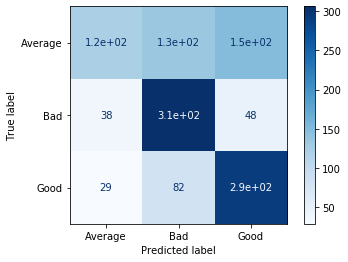

In [10]:
print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)
    

In [11]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

In [ ]:
#start 18:37

In [12]:
%%time
scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring, verbose=10, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.1s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    7.2s remaining:    4.8s


CPU times: user 76.1 ms, sys: 69.8 ms, total: 146 ms
Wall time: 7.48 s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.5s finished


In [13]:
print("-------------------------------------")
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

-------------------------------------
['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.57448591 0.56692647 0.6030178  0.56020195 0.59297879]


### K best Data

In [16]:
#Load Kbest data
arr2= np.load('data_kBest.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 ...
 [1 0 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]] ['Bad' 'Bad' 'Bad' ... 'Average' 'Bad' 'Average']
4800 4800 1200 1200


In [17]:
%%time
tuned_parameters = [{'C': [0.1,1, 10, 100, 1000]}]
clf = GridSearchCV(LinearSVC(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

CPU times: user 4.66 s, sys: 0 ns, total: 4.66 s
Wall time: 4.65 s


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

Best parameters set found on development set:
 {'C': 0.1}

 Best Score 0.4688739965134472

 Grid scores on development set:
0.469 (+/-0.020) for {'C': 0.1}
0.469 (+/-0.020) for {'C': 1}
0.469 (+/-0.020) for {'C': 10}
0.458 (+/-0.046) for {'C': 100}
0.361 (+/-0.044) for {'C': 1000}
Detailed classification report:
The scores are computed on the full evaluation set. 

              precision    recall  f1-score   support

     Average       0.46      0.28      0.35       405
         Bad       0.53      0.49      0.51       392
        Good       0.49      0.72      0.58       403

    accuracy                           0.50      1200
   macro avg       0.50      0.50      0.48      1200
weighted avg       0.50      0.50      0.48      1200


Testing score:  0.48276523868797655

Training Score:  0.46904203445488185


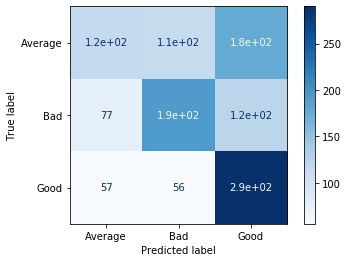

In [18]:
print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)
    

In [19]:
# start time 21 12

In [20]:
%%time
scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring, verbose=10, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.7s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    5.7s remaining:    3.8s


CPU times: user 80 ms, sys: 61 ms, total: 141 ms
Wall time: 6 s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.0s finished


In [21]:
print("-------------------------------------")
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

-------------------------------------
['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.47942543 0.46982902 0.47266061 0.46363159 0.47202167]


### K select Percentile

In [22]:
#Load Kbest data
arr2= np.load('data_select_percentile.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[0.000210523684764536 0.005160091115494809 0.1361031518624642 0 0]
 [0.06578947122576177 0.013897588526412541 0.14469914040114612 0 0]
 [0.005263155277008304 0.010694145453587434 0.11891117478510028 0 1]
 ...
 [0.05263157645429362 0.859810398981424 0.1346704871060172 0 0]
 [0.000988368423653601 0.005792679656356735 0.1017191977077364 1 0]
 [0.17105262939750693 0.057828596847734885 0.13753581661891118 0 0]] ['Bad' 'Bad' 'Bad' ... 'Average' 'Bad' 'Average']
4800 4800 1200 1200


In [23]:
%%time
tuned_parameters = [{'C': [0.1,1, 10, 100, 1000]}]
clf = GridSearchCV(LinearSVC(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

CPU times: user 6.17 s, sys: 0 ns, total: 6.17 s
Wall time: 6.17 s


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

Best parameters set found on development set:
 {'C': 100}

 Best Score 0.5757342325404655

 Grid scores on development set:
0.543 (+/-0.012) for {'C': 0.1}
0.564 (+/-0.013) for {'C': 1}
0.567 (+/-0.012) for {'C': 10}
0.576 (+/-0.022) for {'C': 100}
0.422 (+/-0.082) for {'C': 1000}
Detailed classification report:
The scores are computed on the full evaluation set. 

              precision    recall  f1-score   support

     Average       0.60      0.26      0.36       405
         Bad       0.57      0.78      0.66       392
        Good       0.58      0.70      0.63       403

    accuracy                           0.58      1200
   macro avg       0.58      0.58      0.55      1200
weighted avg       0.58      0.58      0.55      1200


Testing score:  0.550562115309828

Training Score:  0.5687583029163399


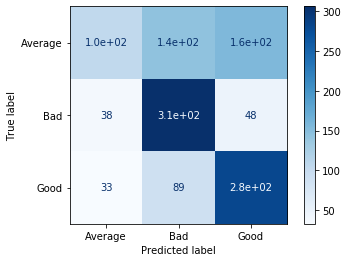

In [24]:
print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)
    

In [25]:
# start time 21 13

In [26]:
%%time
scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring, verbose=10, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.5s remaining:    9.8s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    6.6s remaining:    4.4s


CPU times: user 21.7 ms, sys: 46 µs, total: 21.7 ms
Wall time: 6.77 s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished


In [27]:
print("-------------------------------------")
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

-------------------------------------
['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.56048937 0.55362572 0.57829626 0.56671078 0.5703609 ]


### PCA

In [28]:
#Load Kbest data
arr2= np.load('data_pca.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[-0.45579826472607415 0.7046019793738675 -0.28825772682504214
  -0.10797909629417606]
 [-0.45821755567357747 -0.7059423617884181 -0.2916635351593642
  -0.09416709513907746]
 [-0.21141491550725078 -0.0031579275616275076 0.8725130077194068
  -0.3905247495057231]
 ...
 [-0.4581169085501422 0.717465384690377 -0.2917362036100829
  -0.07432632961038373]
 [0.751538661872047 -0.0025887537747943763 -0.10000450010468652
  -0.05167456137188623]
 [-0.4595648294413432 0.7112979984399956 -0.2918739685292939
  -0.09370938251503302]] ['Bad' 'Bad' 'Bad' ... 'Average' 'Bad' 'Average']
4800 4800 1200 1200


In [29]:
%%time
tuned_parameters = [{'C': [0.1,1, 10, 100, 1000]}]
clf = GridSearchCV(LinearSVC(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

CPU times: user 6.47 s, sys: 6.18 ms, total: 6.47 s
Wall time: 6.52 s


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

Best parameters set found on development set:
 {'C': 100}

 Best Score 0.4694101175345947

 Grid scores on development set:
0.469 (+/-0.020) for {'C': 0.1}
0.469 (+/-0.020) for {'C': 1}
0.469 (+/-0.020) for {'C': 10}
0.469 (+/-0.020) for {'C': 100}
0.353 (+/-0.037) for {'C': 1000}
Detailed classification report:
The scores are computed on the full evaluation set. 

              precision    recall  f1-score   support

     Average       0.46      0.28      0.35       405
         Bad       0.53      0.49      0.51       392
        Good       0.49      0.72      0.58       403

    accuracy                           0.50      1200
   macro avg       0.50      0.50      0.48      1200
weighted avg       0.50      0.50      0.48      1200


Testing score:  0.48276523868797655

Training Score:  0.46904203445488185


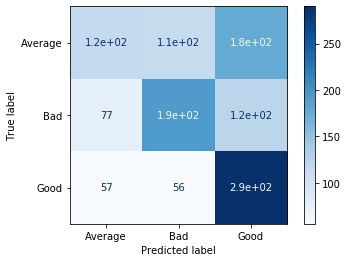

In [30]:
print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)
    

In [31]:
# start time 21 13

In [32]:
%%time
scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring, verbose=10, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.7s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    6.8s remaining:    4.5s


CPU times: user 19 ms, sys: 69 µs, total: 19 ms
Wall time: 7.36 s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.4s finished


In [33]:
print("-------------------------------------")
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

-------------------------------------
['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.47942543 0.46803293 0.47266061 0.46363159 0.47202167]
